In [1]:
print("Hello World")

Hello World


In [2]:
import numpy as np
import pandas as pd
import statistics

In [3]:
foodConsumption = pd.read_csv('food_consumption.csv')
foodConsumption.head(10)

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96
5,6,Argentina,eggs,11.39,10.46
6,7,Argentina,dairy,195.08,277.87
7,8,Argentina,wheat,103.11,19.66
8,9,Argentina,rice,8.77,11.22
9,10,Argentina,soybeans,0.00,0.00


In [4]:
be_consumption = foodConsumption[foodConsumption['country'] == 'Belgium']
usa_consumption = foodConsumption[foodConsumption['country'] == "USA"]

be_consumption.head()
usa_consumption.head()

print(be_consumption['consumption'].agg(['mean','median']))
print(usa_consumption['consumption'].agg(['mean','median']))

mean      42.132727
median    12.590000
Name: consumption, dtype: float64
mean      44.65
median    14.58
Name: consumption, dtype: float64


In [5]:
be_usa = foodConsumption[(foodConsumption['country'] == "Belgium") | (foodConsumption['country'] == 'USA')]
print(be_usa)

consumption = be_usa.groupby('country')['consumption']
result = consumption.agg(['mean','median'])
print(result)


     Unnamed: 0  country food_category  consumption  co2_emission
55           56      USA          pork        27.64         97.83
56           57      USA       poultry        50.01         53.72
57           58      USA          beef        36.24       1118.29
58           59      USA     lamb_goat         0.43         15.06
59           60      USA          fish        12.35         19.72
60           61      USA          eggs        14.58         13.39
61           62      USA         dairy       254.69        362.78
62           63      USA         wheat        80.43         15.34
63           64      USA          rice         6.88          8.80
64           65      USA      soybeans         0.04          0.02
65           66      USA          nuts         7.86         13.91
396         397  Belgium          pork        38.65        136.80
397         398  Belgium       poultry        12.20         13.11
398         399  Belgium          beef        15.63        482.31
399       

      Unnamed: 0       country food_category  consumption  co2_emission
8              9     Argentina          rice         8.77         11.22
19            20     Australia          rice        11.03         14.12
30            31       Albania          rice         7.78          9.96
41            42       Iceland          rice         3.89          4.98
52            53   New Zealand          rice         9.16         11.72
...          ...           ...           ...          ...           ...
1383        1384  Sierra Leone          rice       103.30        132.19
1394        1395     Sri Lanka          rice       109.72        140.41
1405        1406     Indonesia          rice       134.62        172.27
1416        1417       Liberia          rice        94.75        121.25
1427        1428    Bangladesh          rice       171.73        219.76

[130 rows x 5 columns]
8        11.22
19       14.12
30        9.96
41        4.98
52       11.72
         ...  
1383    132.19
1394   

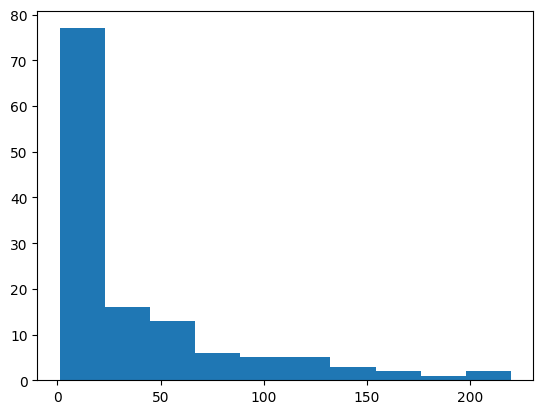

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


In [6]:
import matplotlib.pyplot as plt

rice_consumption = foodConsumption[foodConsumption['food_category'] == 'rice']
print(rice_consumption)

co2 = rice_consumption['co2_emission']
print(co2)

plt.hist(co2, bins=10)
plt.show()

mean_median = co2.agg(['mean','median'])
print(mean_median)

In [7]:
print(np.quantile(rice_consumption['co2_emission'],0.5))

15.2


In [8]:
np.quantile(foodConsumption['co2_emission'],np.linspace(0,1,4))


array([   0.        ,    8.05333333,   35.86666667, 1712.        ])

In [9]:
np.quantile(foodConsumption['co2_emission'],np.linspace(0,1,6))

array([   0.   ,    3.54 ,   11.026,   25.59 ,   99.978, 1712.   ])

In [10]:
np.quantile(foodConsumption['co2_emission'],np.linspace(0,1,10))

array([0.00000000e+00, 9.05555556e-01, 4.19111111e+00, 8.05333333e+00,
       1.32000000e+01, 2.10944444e+01, 3.58666667e+01, 7.90622222e+01,
       1.86115556e+02, 1.71200000e+03])

In [11]:
by_food = foodConsumption.groupby('food_category')['co2_emission'].agg(['var','std'])
by_food.head(30)

,var,std
food_category,,
beef,88748.408132,297.906710
dairy,17671.891985,132.935669
eggs,21.371819,4.622966
fish,921.637349,30.358481
lamb_goat,16475.518363,128.356996
nuts,35.639652,5.969895
pork,3094.963537,55.632396
poultry,245.026801,15.653332
rice,2281.376243,47.763754


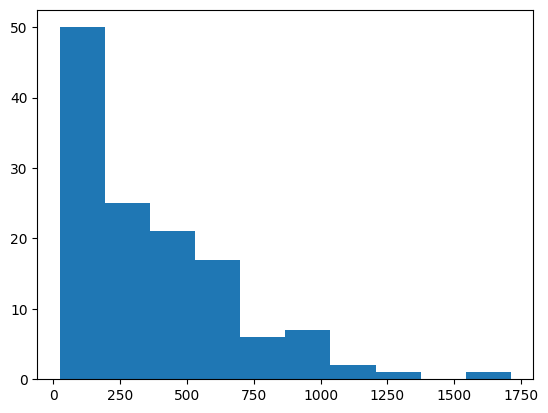

In [12]:
beef = foodConsumption[foodConsumption['food_category'] == 'beef']
co2 = beef['co2_emission']
plt.hist(co2,bins=10)
plt.show()

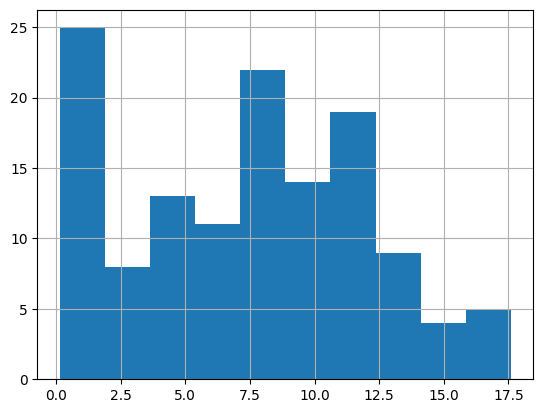

In [13]:
foodConsumption[foodConsumption['food_category'] == 'eggs']['co2_emission'].hist()
plt.show()

In [14]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = foodConsumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


In [15]:
amir_deals = pd.read_csv('amir_deals.csv')
amir_deals.head()

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17


In [16]:
counts = amir_deals['product'].value_counts()
print(counts)
poss = amir_deals.shape[0]
print(poss)

product
Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: count, dtype: int64
178


In [17]:
probs = counts/poss
print(probs)

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: count, dtype: float64


In [18]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11
     Unnamed: 0    product   client status   amount  num_users
133         134  Product D  Current    Won  5992.86         98
101         102  Product H  Current    Won  5116.34         63
110         111  Product B  Current    Won   696.88         44
49           50  Product B  Current    Won  3488.36         79
56           57  Product D  Current    Won  6820.84         42


In [19]:
restaurant_groups = pd.read_csv('restaurant_groups.csv')
restaurant_groups.head()

,Unnamed: 0,group_id,group_size
0,0,A,2
1,1,B,4
2,2,C,6
3,3,D,2
4,4,E,2


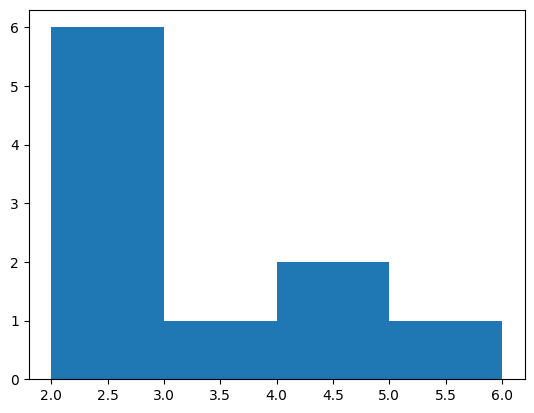

In [20]:
plt.hist(restaurant_groups['group_size'],bins= [2,3,4,5,6])
plt.show()

In [21]:
n_size = restaurant_groups['group_size'].value_counts()
print(n_size)

n_total = restaurant_groups.shape[0]
print(n_total)

size_dist = n_size/n_total
print(size_dist)

size_dist = size_dist.reset_index()
size_dist.columns = ['group_size','prob']
print(size_dist)


# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
print('The expected value is', expected_value)

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more['prob'])
print('The probability is ',prob_4_or_more)

group_size
2    6
4    2
6    1
3    1
Name: count, dtype: int64
10
group_size
2    0.6
4    0.2
6    0.1
3    0.1
Name: count, dtype: float64
   group_size  prob
0           2   0.6
1           4   0.2
2           6   0.1
3           3   0.1
The expected value is 2.9000000000000004
The probability is  0.30000000000000004


In [22]:
from scipy.stats import uniform

min_time = uniform.cdf(0,0,30)
max_time = uniform.cdf(30,0,30)

prob_less_than_5 = uniform.cdf(5,0,30)
print(prob_less_than_5)

prob_more_than_5 = 1-uniform.cdf(5,0,30)
print(prob_more_than_5)

prob_between_10_20 = uniform.cdf(20,0,30) - uniform.cdf(10,0,30)
print(prob_between_10_20) 

0.16666666666666666
0.8333333333333334
0.3333333333333333


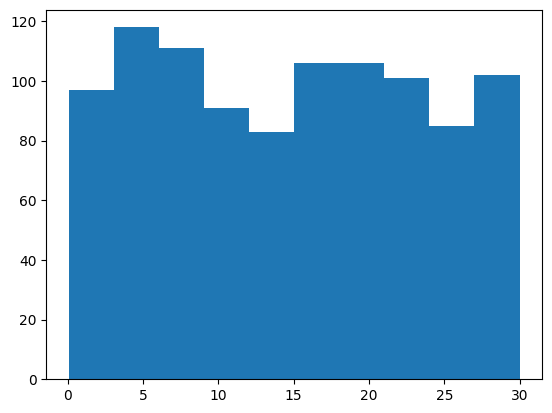

In [23]:
np.random.seed(334)

wait_time = uniform.rvs(0,30,size=1000)
plt.hist(wait_time)
plt.show()

In [28]:
import seaborn as sns
world_happiness = pd.read_csv("world_happiness.csv")

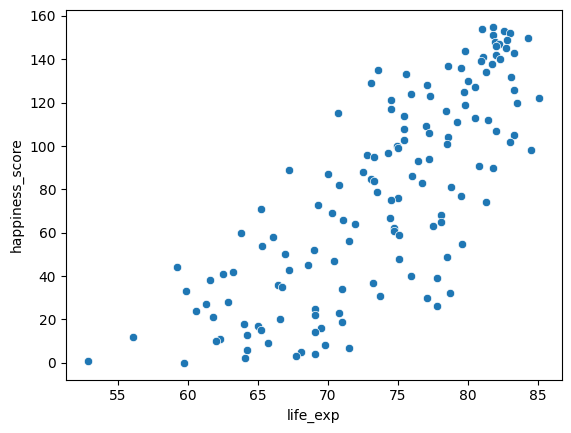

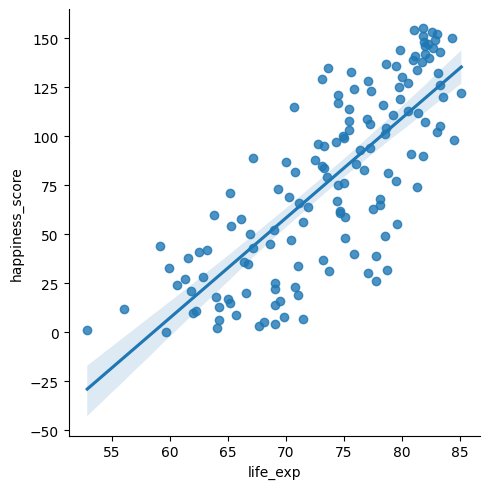

0.7802249053272065


In [29]:
# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(x='life_exp', y='happiness_score', data=world_happiness)
plt.show()

# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness)
plt.show()

# Correlation between life_exp and happiness_score
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])
print(cor)

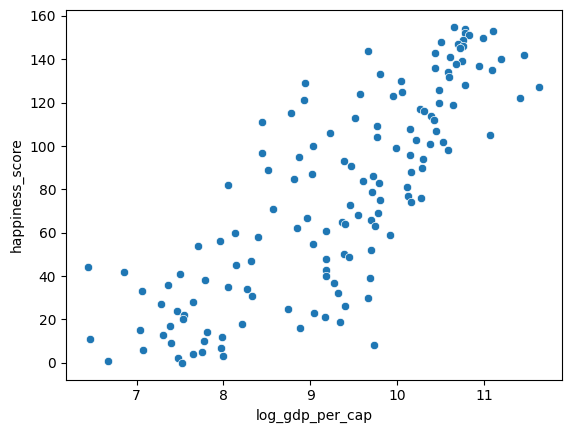

0.8043146004918288


In [30]:
# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# Scatter plot of happiness_score vs. log_gdp_per_cap
sns.scatterplot(x='log_gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)